In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import random
import pandas as pd

import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel

!pip install pyldavis
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt

     |████████████████████████████████| 1.7MB 7.7MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=2abae9b71e17ecf36e310d14e7dc38ca84fc78774923e1ae0a4c29030c589688
  Stored in directory: /root/.cache/pip/wheels/74/df/b6/97234c8446a43be05c9a8687ee0db1f1b5ade5f27729187eae
Successfully built pyldavis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [3]:
df_baby = pd.read_json('/content/drive/MyDrive/COLAB/NLP/Practica/datasets/reviews_Baby_5.json', lines=True )
df_electronic = pd.read_json('/content/drive/MyDrive/COLAB/NLP/Practica/datasets/reviews_Electronics_5.json', lines=True )
df_healthAnnPersonalCare = pd.read_json('/content/drive/MyDrive/COLAB/NLP/Practica/datasets/reviews_Health_and_Personal_Care_5.json', lines=True )
df_sportsAndOutdoors = pd.read_json('/content/drive/MyDrive/COLAB/NLP/Practica/datasets/reviews_Sports_and_Outdoors_5.json', lines=True )

In [4]:
print(len(df_baby))
print(len(df_electronic))
print(len(df_healthAnnPersonalCare))
print(len(df_sportsAndOutdoors))

160792
1689188
346355
296337


In [5]:
df_baby = df_baby.iloc[:50000,]
df_baby.head()

reviewerID        asin  ... unixReviewTime   reviewTime
0  A1HK2FQW6KXQB2  097293751X  ...     1373932800  07 16, 2013
1  A19K65VY14D13R  097293751X  ...     1372464000  06 29, 2013
2  A2LL1TGG90977E  097293751X  ...     1395187200  03 19, 2014
3   A5G19RYX8599E  097293751X  ...     1376697600  08 17, 2013
4   A2496A4EWMLQ7  097293751X  ...     1396310400   04 1, 2014

[5 rows x 9 columns]

In [6]:
df_electronic = df_electronic.iloc[:50000,]
df_electronic.head()

reviewerID        asin  ... unixReviewTime   reviewTime
0   AO94DHGC771SJ  0528881469  ...     1370131200   06 2, 2013
1   AMO214LNFCEI4  0528881469  ...     1290643200  11 25, 2010
2  A3N7T0DY83Y4IG  0528881469  ...     1283990400   09 9, 2010
3  A1H8PY3QHMQQA0  0528881469  ...     1290556800  11 24, 2010
4  A24EV6RXELQZ63  0528881469  ...     1317254400  09 29, 2011

[5 rows x 9 columns]

In [7]:
df_healthAnnPersonalCare = df_electronic.iloc[:50000,]
df_healthAnnPersonalCare.head()

reviewerID        asin  ... unixReviewTime   reviewTime
0   AO94DHGC771SJ  0528881469  ...     1370131200   06 2, 2013
1   AMO214LNFCEI4  0528881469  ...     1290643200  11 25, 2010
2  A3N7T0DY83Y4IG  0528881469  ...     1283990400   09 9, 2010
3  A1H8PY3QHMQQA0  0528881469  ...     1290556800  11 24, 2010
4  A24EV6RXELQZ63  0528881469  ...     1317254400  09 29, 2011

[5 rows x 9 columns]

In [8]:
df_sportsAndOutdoors = df_sportsAndOutdoors.iloc[:50000,]
df_sportsAndOutdoors.head()

reviewerID        asin  ... unixReviewTime   reviewTime
0    AIXZKN4ACSKI  1881509818  ...     1390694400  01 26, 2014
1  A1L5P841VIO02V  1881509818  ...     1328140800   02 2, 2012
2   AB2W04NI4OEAD  1881509818  ...     1330387200  02 28, 2012
3  A148SVSWKTJKU6  1881509818  ...     1328400000   02 5, 2012
4   AAAWJ6LW9WMOO  1881509818  ...     1366675200  04 23, 2013

[5 rows x 9 columns]

In [9]:
df_baby = df_baby[['reviewText']]
df_baby.dropna(inplace=True)

df_electronic = df_electronic[['reviewText']]
df_electronic.dropna(inplace=True)

df_healthAnnPersonalCare = df_healthAnnPersonalCare[['reviewText']]
df_healthAnnPersonalCare.dropna(inplace=True)

df_sportsAndOutdoors = df_sportsAndOutdoors[['reviewText']]
df_sportsAndOutdoors.dropna(inplace=True)

In [10]:
dfAll = [df_baby, df_electronic, df_healthAnnPersonalCare, df_sportsAndOutdoors]
#dfAll = [df_baby, df_electronic, df_sportsAndOutdoors]
#dfAll = [df_baby, df_electronic]
df =pd.concat(dfAll)
df.dropna()
df.head()

reviewText
0  Perfect for new parents. We were able to keep ...
1  This book is such a life saver.  It has been s...
2  Helps me know exactly how my babies day has go...
3  I bought this a few times for my older son and...
4  I wanted an alternative to printing out daily ...

In [11]:
# PREPROCESADO
def text_preprocessing(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(token)
    return result

In [12]:
df.dropna()
processed_texts = []
for text in df['reviewText']:
    processed_texts.append(text_preprocessing(text))

In [13]:
processed_texts[:5]

[['perfect',
  'parents',
  'able',
  'track',
  'baby',
  'feeding',
  'sleep',
  'diaper',
  'change',
  'schedule',
  'half',
  'months',
  'life',
  'life',
  'easier',
  'doctor',
  'questions',
  'habits',
  'right'],
 ['book',
  'life',
  'saver',
  'helpful',
  'able',
  'track',
  'trends',
  'answer',
  'pediatrician',
  'questions',
  'communicate',
  'different',
  'times',
  'night',
  'newborn',
  'think',
  'things',
  'required',
  'leave',
  'hospital',
  'went',
  'pages',
  'newborn',
  'version',
  'moved',
  'infant',
  'version',
  'finish',
  'second',
  'infant',
  'book',
  'total',
  'right',
  'baby',
  'turns',
  'things',
  'haves',
  'baby'],
 ['helps',
  'know',
  'exactly',
  'babies',
  'gone',
  'mother',
  'watching',
  'work',
  'section',
  'write',
  'notes',
  'know',
  'need',
  'couldn',
  'happier',
  'book'],
 ['bought',
  'times',
  'older',
  'bought',
  'newborn',
  'super',
  'easy',
  'helps',
  'track',
  'daily',
  'routine',
  'started

In [14]:
dictionary = Dictionary(processed_texts)

In [15]:
list(dictionary.items())

[(0, 'able'),
 (1, 'baby'),
 (2, 'change'),
 (3, 'diaper'),
 (4, 'doctor'),
 (5, 'easier'),
 (6, 'feeding'),
 (7, 'habits'),
 (8, 'half'),
 (9, 'life'),
 (10, 'months'),
 (11, 'parents'),
 (12, 'perfect'),
 (13, 'questions'),
 (14, 'right'),
 (15, 'schedule'),
 (16, 'sleep'),
 (17, 'track'),
 (18, 'answer'),
 (19, 'book'),
 (20, 'communicate'),
 (21, 'different'),
 (22, 'finish'),
 (23, 'haves'),
 (24, 'helpful'),
 (25, 'hospital'),
 (26, 'infant'),
 (27, 'leave'),
 (28, 'moved'),
 (29, 'newborn'),
 (30, 'night'),
 (31, 'pages'),
 (32, 'pediatrician'),
 (33, 'required'),
 (34, 'saver'),
 (35, 'second'),
 (36, 'things'),
 (37, 'think'),
 (38, 'times'),
 (39, 'total'),
 (40, 'trends'),
 (41, 'turns'),
 (42, 'version'),
 (43, 'went'),
 (44, 'babies'),
 (45, 'couldn'),
 (46, 'exactly'),
 (47, 'gone'),
 (48, 'happier'),
 (49, 'helps'),
 (50, 'know'),
 (51, 'mother'),
 (52, 'need'),
 (53, 'notes'),
 (54, 'section'),
 (55, 'watching'),
 (56, 'work'),
 (57, 'write'),
 (58, 'better'),
 (59, 'bo

In [16]:
len(dictionary)

76185

In [17]:
corpus = [dictionary.doc2bow(doc) for doc in processed_texts]

In [18]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 2),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1)],
 [(0, 1),
  (1, 2),
  (9, 1),
  (13, 1),
  (14, 1),
  (17, 1),
  (18, 1),
  (19, 2),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 2),
  (27, 1),
  (28, 1),
  (29, 2),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 2),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 2),
  (43, 1)],
 [(19, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 2),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1)],
 [(17, 4),
  (29, 1),
  (38, 1),
  (43, 2),
  (49, 1),
  (50, 1),
  (53, 1),
  (56, 2),
  (58, 1),
  (59, 2),
  (60, 1),
  (61, 2),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 2),
  (67, 1),
  (68, 1),
  (69, 2),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1)

In [19]:
corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 2),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1)]

In [20]:
# Entrenamos el modelo (LDA)
# jugar con los topics
# Mi modelo indica que 5 es el mejor numero de topics
num_topics = 5

lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    iterations=5,
    passes=10,
    alpha='auto'
)

Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += 

In [21]:
lda_model.show_topics()

[(0,
  '0.016*"water" + 0.011*"pump" + 0.010*"time" + 0.009*"bottle" + 0.007*"product" + 0.007*"amazon" + 0.007*"work" + 0.007*"rack" + 0.006*"clean" + 0.006*"chain"'),
 (1,
  '0.041*"bike" + 0.014*"seat" + 0.009*"ride" + 0.009*"tire" + 0.009*"watch" + 0.008*"grip" + 0.008*"hand" + 0.008*"road" + 0.007*"riding" + 0.007*"like"'),
 (2,
  '0.026*"great" + 0.023*"good" + 0.019*"like" + 0.012*"little" + 0.012*"price" + 0.010*"easy" + 0.010*"works" + 0.010*"bought" + 0.010*"nice" + 0.009*"quality"'),
 (3,
  '0.036*"knife" + 0.014*"light" + 0.014*"blade" + 0.010*"scope" + 0.010*"sharp" + 0.010*"lens" + 0.008*"pocket" + 0.008*"tool" + 0.008*"knives" + 0.006*"mount"'),
 (4,
  '0.008*"cable" + 0.007*"sound" + 0.007*"unit" + 0.007*"power" + 0.006*"battery" + 0.005*"installed" + 0.005*"batteries" + 0.005*"install" + 0.005*"work" + 0.004*"switch"')]

In [22]:
word_dict = {};
for i in range(num_topics):
    words = lda_model.show_topic(i, topn = 20)
    word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

Topic #01 Topic #02  Topic #03 Topic #04   Topic #05
0      water      bike      great     knife       cable
1       pump      seat       good     light       sound
2       time      ride       like     blade        unit
3     bottle      tire     little     scope       power
4    product     watch      price     sharp     battery
5     amazon      grip       easy      lens   installed
6       work      hand      works    pocket   batteries
7       rack      road     bought      tool     install
8      clean    riding       nice    knives        work
9      chain      like    quality     mount      switch
10      tent     hands      small     rifle        home
11      tube     bikes     better    sheath        need
12  cleaning      lock       size      edge      device
13   problem      time  recommend     range        want
14      days     tires       need      open       model
15     tried      ball       long  shooting        time
16      tool     right    product     steel     problem
17      took   bicycle    perfect      belt  headphones
18     stove    saddle       work     frame       phone
19     valve     miles       fits     tools        line

In [23]:
# Perplexity y Coherence
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # Medida de qué tan bueno es el modelo. Cuanto más bajo, mejor

# Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += 


Perplexity:  -8.249902879502505

Coherence Score:  0.44665402540847665


In [24]:
# Visualizar los topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.015989  0.053355       1        1  31.950464
4      0.009163  0.082615       2        1  26.207355
0      0.264019  0.035635       3        1  15.623451
3     -0.226791  0.132129       4        1  13.393536
1     -0.062381 -0.303735       5        1  12.825194, topic_info=         Term          Freq         Total Category  logprob  loglift
19262    bike  38112.000000  38112.000000  Default  30.0000  30.0000
3234    knife  35155.000000  35155.000000  Default  29.0000  29.0000
104     great  61877.000000  61877.000000  Default  28.0000  28.0000
311      good  60788.000000  60788.000000  Default  27.0000  27.0000
244     water  17724.000000  17724.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
160      left   3279.065199   6157.652469   Topic5  -5.6568   1.4236
14      right   4407.288827  18433.889424   Topic5  -5.3611   0.6228
93       time   5311.841010  34730.349591   Topic5  -5.1744   0.1761
257      like   6213.926046  59865.799669   Topic5  -5.0176  -0.2116
325    little   3274.803962  33170.196711   Topic5  -5.6581  -0.2616

[310 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
5042       2  0.999790  adapter
1426       1  0.092728   amazon
1426       2  0.123116   amazon
1426       3  0.784132   amazon
59078      1  0.998961     ammo
...      ...       ...      ...
855        1  0.397895    years
855        2  0.258880    years
855        3  0.207588    years
855        4  0.022674    years
855        5  0.112930    years

[666 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 1, 4, 2])

In [25]:
pyLDAvis.save_html(vis, '/content/drive/MyDrive/COLAB/NLP/Practica/topics_vis_0.html')

In [26]:
# Número óptimo de topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        
        # Build LDA model
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics)
        
        # Create a list of LDA models
        model_list.append(model)
        
        # Compute the Coherence for each model
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [27]:
# Grid sobre el número de topics (puede tardar un buen rato)
start_ = 4
end_ = 10
step_ = 1

In [28]:
model_list, coherence_values = compute_coherence_values(
    dictionary=dictionary,
    corpus=corpus,
    texts=processed_texts,
    start=start_,
    limit=end_,
    step=step_
)

Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += 

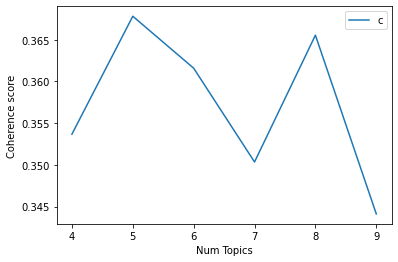

In [29]:
x = range(start_, end_, step_)
plt.plot(x, coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence score')
plt.legend(('coherence_values'), loc='best')
plt.show()

In [30]:
optimal_model_id = -1

optimal_model = model_list[optimal_model_id]

word_dict = {};
for i in range(0, optimal_model.num_topics , 1):
    words = optimal_model.show_topic(i, topn = 20)
    word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

Topic #01  Topic #02    Topic #03  ... Topic #07 Topic #08 Topic #09
0      blade     pistol         good  ...      bike      good     great
1       tool      watch  comfortable  ...      seat     price      good
2       easy       ball         like  ...     scope   quality     light
3      steel      light         ride  ...      like   product      like
4      works       like        great  ...      tire    amazon     price
5       like  batteries         wear  ...    little    better      nice
6       good      great       riding  ...      easy   reviews   quality
7       work       time       better  ...      grip  shooting     sharp
8       rack   survival         head  ...     small      time      case
9       need       play      quality  ...      road     money      lens
10     great      brake        price  ...      size    bought      size
11   plastic     bright         pair  ...    weight     range    knives
12      lock     button         long  ...     great      like      fits
13    handle     lights         time  ...     bikes     great   camping
14    sheath    battery       bought  ...      rear      shot    little
15     mount   features       helmet  ...     rifle    camera     carry
16     chain       good       little  ...    easily    review     small
17   product      field         feel  ...    handle    rounds    pocket
18    little       card        sound  ...   bicycle      unit      pack
19   install      balls        watch  ...      nice      know   perfect

[20 rows x 9 columns]

In [31]:
# Topic dominante por texto
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [32]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=processed_texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

Document_No  ...                                               Text
0            0  ...  [perfect, parents, able, track, baby, feeding,...
1            1  ...  [book, life, saver, helpful, able, track, tren...
2            2  ...  [helps, know, exactly, babies, gone, mother, w...
3            3  ...  [bought, times, older, bought, newborn, super,...
4            4  ...  [wanted, alternative, printing, daily, sheets,...
5            5  ...  [great, basics, wish, space, write, things, bi...
6            6  ...  [month, spend, half, days, mother, half, neigh...
7            7  ...  [book, perfect, time, book, easy, track, feedi...
8            8  ...  [wanted, love, pretty, expensive, months, wort...
9            9  ...  [baby, tracker, brand, books, absolute, best, ...

[10 rows x 5 columns]

In [33]:
# Distribución de topics en el corpus
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), num_topics)
df_topic_contribution = pd.DataFrame({'topic': topic_contribution.index, 'contribution': topic_contribution})
df_topic_contribution.reset_index(drop=True, inplace=True)

# Show
df_topic_contribution

topic  contribution
0    8.0       0.18661
1    7.0       0.17120
2    2.0       0.13820
3    0.0       0.12485
4    3.0       0.11238
5    6.0       0.10296
6    1.0       0.07348
7    4.0       0.06924
8    5.0       0.02107